In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 🔑Note: 
The line of code below is responsible for creating plots with dark background. You can do run this notebook without turning it on. If you are going to turn it on, you will not see the values of the tables we create using pandas dataframe later in this notebook. So I recomment if you can run the code atleast once with this line witch of and then after you've seen the results of the enter notebook you can turn it on and specificaly rerun only your plotting celling with exlusion of the tables.

In [55]:
plt.style.use('dark_background')

In [3]:
# read in the data
data = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset.csv")
data.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
0,5/31/2018 23:59,6/1/2018 0:12,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97
1,5/31/2018 23:59,6/1/2018 0:12,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45
2,5/31/2018 23:59,6/1/2018 0:08,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28
3,5/31/2018 23:59,6/1/2018 0:07,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75
4,5/31/2018 23:59,6/1/2018 0:07,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05


In [4]:
# Get a look at the data tail
data.tail()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
1048570,5/10/2018 7:54,5/10/2018 8:10,482,W 15 St & 7 Ave,173,Broadway & W 49 St,Subscriber,30426,female,25,16.03
1048571,5/10/2018 7:54,5/10/2018 7:56,241,DeKalb Ave & S Portland Ave,324,DeKalb Ave & Hudson Ave,Subscriber,18292,male,28,1.93
1048572,5/10/2018 7:54,5/10/2018 8:22,427,Bus Slip & State St,448,W 37 St & 10 Ave,Subscriber,31663,male,53,27.38
1048573,5/10/2018 7:54,5/10/2018 8:01,492,W 33 St & 7 Ave,517,Pershing Square South,Subscriber,32680,male,48,6.62
1048574,5/10/2018 7:54,5/10/2018 8:04,161,LaGuardia Pl & W 3 St,268,Howard St & Centre St,Subscriber,15687,male,26,9.55


In [5]:
# check the length the dataset
len(data)

1048575

In [6]:
# Checking for duplicates in the dataset
np.sum(data.duplicated())

0

In [7]:
# get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   start_time          1048575 non-null  object 
 1   stop_time           1048575 non-null  object 
 2   start_station_id    1048575 non-null  int64  
 3   start_station_name  1048575 non-null  object 
 4   end_station_id      1048575 non-null  int64  
 5   end_station_name    1048575 non-null  object 
 6   user_type           1048575 non-null  object 
 7   bike_id             1048575 non-null  int64  
 8   gender              1048575 non-null  object 
 9   age                 1048575 non-null  int64  
 10  trip_duration       1048575 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 88.0+ MB


The dataset has 1048575 records with neither duplicates nor missing values in it.

In [8]:
# Convert star_time and stop_time into datetime object
data = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset.csv",
                   parse_dates = ["start_time", "stop_time"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1048575 non-null  datetime64[ns]
 1   stop_time           1048575 non-null  datetime64[ns]
 2   start_station_id    1048575 non-null  int64         
 3   start_station_name  1048575 non-null  object        
 4   end_station_id      1048575 non-null  int64         
 5   end_station_name    1048575 non-null  object        
 6   user_type           1048575 non-null  object        
 7   bike_id             1048575 non-null  int64         
 8   gender              1048575 non-null  object        
 9   age                 1048575 non-null  int64         
 10  trip_duration       1048575 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 88.0+ MB


## User type with most users

In [9]:
# Get the count of the unique values of the user_type
user_type = data["user_type"].value_counts()
user_type

Subscriber    998819
Customer       49756
Name: user_type, dtype: int64

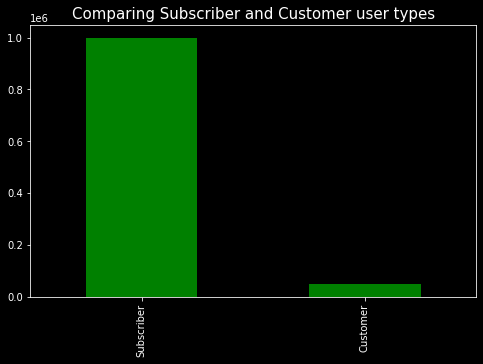

In [56]:
# Compaire user types using a bar graph
data["user_type"].value_counts().plot(figsize = (8,5), kind = "bar", label = True, color ="g");
plt.title("Comparing Subscriber and Customer user types", fontsize = (15));

## Gender with most users

In [11]:
# Get the total count of each gender class in the dataset
data["gender"].value_counts()

male      775886
female    272689
Name: gender, dtype: int64

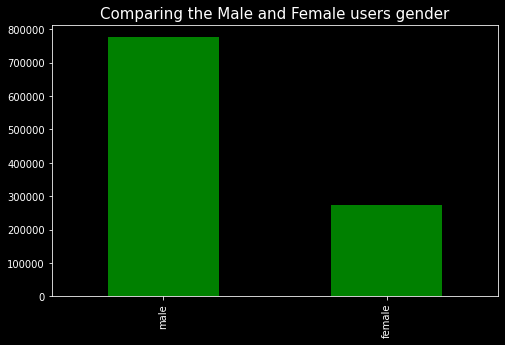

In [57]:
# Visualize the count of the two genders above
data["gender"].value_counts().plot(figsize = (8,5), kind = "bar", label = True, color ="g");
plt.title("Comparing the Male and Female users gender", fontsize = (15));

## Group users into a Five-Years Age Groups

In [13]:
# Check for the minimum age in the dataset
np.min(data["age"])

16

In [14]:
# Check for the maximum age in the dataset
np.max(data["age"])

65

In [15]:
# Creating a 5-years age groups
i = 15
age_group = []
while i < 70:
    age = i + 4
    age_group.append(f"{i}-{age}")
    i+=5

age_group

['15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69']

In [16]:
# Create age_group column to the dataset (of zeros)
data["age_group"] = 0

In [17]:
# confirm the length of our new colum is similar to that of the dataset
len(data["age_group"])

1048575

In [18]:
# Asign appropriate classes to all users
for i in enumerate(data["age"]):
    if i[1] >= 15 and i[1] <= 19:
        data["age_group"][i[0]]  = age_group[0]
    elif i[1] >= 20 and i[1] <= 24:
        data["age_group"][i[0]]  = age_group[1]
    elif i[1] >= 25 and i[1] <= 29:
        data["age_group"][i[0]]  = age_group[2]
    elif i[1] >= 30 and i[1] <= 34:
        data["age_group"][i[0]]  = age_group[3]
    elif i[1] >= 35 and i[1] <= 39:
        data["age_group"][i[0]]  = age_group[4]
    elif i[1] >= 40 and i[1] <= 44:
        data["age_group"][i[0]]  = age_group[5]
    elif i[1] >= 45 and i[1] <= 49:
        data["age_group"][i[0]]  = age_group[6]
    elif i[1] >= 50 and i[1] <= 54:
        data["age_group"][i[0]]  = age_group[7]
    elif i[1] >= 55 and i[1] <= 59:
        data["age_group"][i[0]]  = age_group[8]
    elif i[1] >= 60 and i[1] <= 64:
        data["age_group"][i[0]]  = age_group[9]
    else:
        data["age_group"][i[0]]  = age_group[10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
# Get the total count of user under each class
user_groups = data["age_group"].value_counts()
user_groups

30-34    210681
25-29    210251
35-39    153059
40-44    110530
45-49    100935
50-54     80597
20-24     67165
55-59     63926
60-64     38349
15-19      8109
65-69      4973
Name: age_group, dtype: int64

In [20]:
# Create a dataframe of age-groups and the count of users in each 
# reindex the dataframe by order of the age_groups list we 
# previously created (this ensures data we obtain follows the order of the class)
data_set = pd.DataFrame({"Age_group": user_groups.index[:], "Users": user_groups}).reindex(age_group)
data_set

,Age_group,Users
15-19,15-19,8109
20-24,20-24,67165
25-29,25-29,210251
30-34,30-34,210681
35-39,35-39,153059
40-44,40-44,110530
45-49,45-49,100935
50-54,50-54,80597
55-59,55-59,63926
60-64,60-64,38349


/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


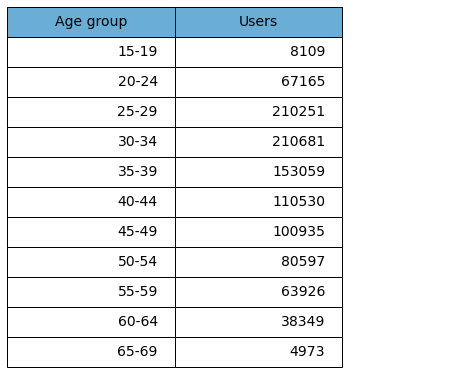

In [21]:
# Create a table using the above dataframe
users_data = data_set
col_head = ("Age group", "Users")
users_data_np = users_data.to_numpy()
# define the figure to plot the data
plt.figure(linewidth = 2, tight_layout={"pad": 0.5}, figsize = (2,1))

axes_8 = plt.gca()
axes_8.get_xaxis().set_visible(False)
axes_8.get_yaxis().set_visible(False)
plt.box(on = None)

# craete a color map
ccolors = plt.cm.Blues(np.full(len(col_head), 0.5))
the_table = plt.table(cellText = users_data_np, loc ="left", colLabels= col_head,
                      colColours = ccolors)
# define font sizee
the_table.set_fontsize(14);
the_table.scale(3, 2.5);

In [59]:
# plot the data

# Get indeces
Indeces = user_groups.index[:]
print(Indeces.tolist())

['30-34', '25-29', '35-39', '40-44', '45-49', '50-54', '20-24', '55-59', '60-64', '15-19', '65-69']


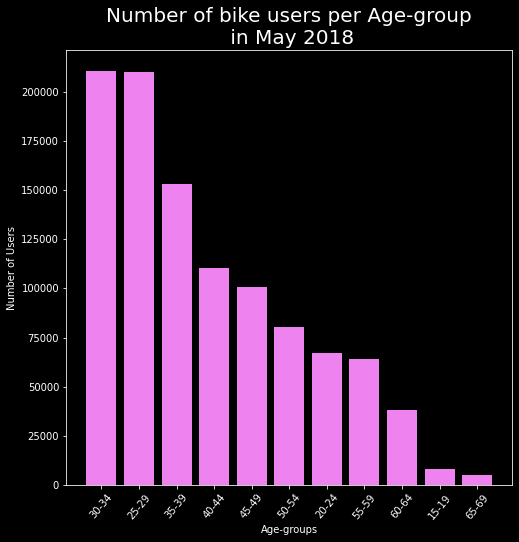

In [61]:
plt.figure(figsize=(8,8))
plt.bar(Indeces, user_groups, color = "violet")
plt.title("Number of bike users per Age-group\n in May 2018", fontsize = 20)
plt.xticks(rotation = 50)

# giving X and Y labels
plt.xlabel("Age-groups")
plt.ylabel("Number of Users")
plt.show();

In [62]:
# Creating a 5 increment age groups
i = 15
age_group_10 = []
while i < 70:
    age = i + 9
    age_group_10.append(f"{i}-{age}")
    i+=10

age_group_10

['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']

In [63]:
# Create age_group column (with zeros)
data["age_group_10"] = 0

In [64]:
for i in enumerate(data["age"]):
    if i[1] >= 15 and i[1] <= 24:
        data["age_group_10"][i[0]]  = age_group_10[0]
    elif i[1] >= 25 and i[1] <= 34:
        data["age_group_10"][i[0]]  = age_group_10[1]
    elif i[1] >= 35 and i[1] <= 44:
        data["age_group_10"][i[0]]  = age_group_10[2]
    elif i[1] >= 45 and i[1] <= 54:
        data["age_group_10"][i[0]]  = age_group_10[3]
    elif i[1] >= 55 and i[1] <= 64:
        data["age_group_10"][i[0]]  = age_group_10[4]
    else:
        data["age_group_10"][i[0]]  = age_group_10[5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [65]:
user_groups_10 = data["age_group_10"].value_counts()
user_groups_10

25-34    420932
35-44    263589
45-54    181532
55-64    102275
15-24     75274
65-74      4973
Name: age_group_10, dtype: int64

In [66]:
users_data_10 = pd.DataFrame({"Age_group": user_groups_10.index[:], "Users": user_groups_10}).reindex(age_group_10)
users_data_10

,Age_group,Users
15-24,15-24,75274
25-34,25-34,420932
35-44,35-44,263589
45-54,45-54,181532
55-64,55-64,102275
65-74,65-74,4973


/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


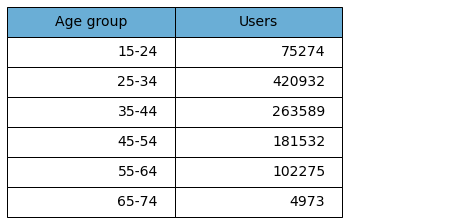

In [29]:
users_data = users_data_10
col_head = ("Age group", "Users")
users_data_np = users_data.to_numpy()
# define the figure to plot the data
plt.figure(linewidth = 2, tight_layout={"pad": 0.5}, figsize = (2,1))

axes_8 = plt.gca()
axes_8.get_xaxis().set_visible(False)
axes_8.get_yaxis().set_visible(False)
plt.box(on = None)

# craete a color map
ccolors = plt.cm.Blues(np.full(len(col_head), 0.5))
the_table = plt.table(cellText = users_data_np, loc ="left", colLabels= col_head,
                      colColours = ccolors)
# define font sizee
the_table.set_fontsize(14);
the_table.scale(3, 2.5);

In [67]:
Indeces = user_groups_10.index[:]
print(Indeces.tolist())

['25-34', '35-44', '45-54', '55-64', '15-24', '65-74']


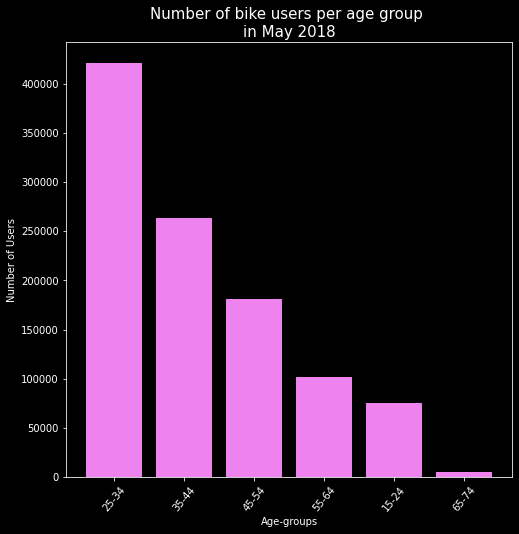

In [68]:
plt.figure(figsize=(8,8))
plt.bar(Indeces, user_groups_10, color = "violet")
plt.title("Number of bike users per age group \nin May 2018", fontsize = 15)
plt.xticks(rotation = 50)

# giving X and Y labels
plt.xlabel("Age-groups")
plt.ylabel("Number of Users")
plt.show();

## Most Visted station

In [32]:
# Get trips starting station names
per_stations_counts = data['start_station_name']
first_10 = per_stations_counts[:10]
first_10

0           Allen St & Stanton St
1         Allen St & Rivington St
2                 E 12 St & 3 Ave
3        Bedford Ave & Nassau Ave
4    Central Park West & W 102 St
5      Classon Ave & St Marks Ave
6                 9 Ave & W 45 St
7        MacDougal St & Prince St
8         Lexington Ave & E 24 St
9         Clinton St & Tillary St
Name: start_station_name, dtype: object

In [33]:
# confirm the algnment of this column with that of the dataset
len(per_stations_counts)

1048575

In [34]:
# Have a look at the first 10 names
value = first_10.tolist()
value

['Allen St & Stanton St',
 'Allen St & Rivington St',
 'E 12 St & 3 Ave',
 'Bedford Ave & Nassau Ave',
 'Central Park West & W 102 St',
 'Classon Ave & St Marks Ave',
 '9 Ave & W 45 St',
 'MacDougal St & Prince St',
 'Lexington Ave & E 24 St',
 'Clinton St & Tillary St']

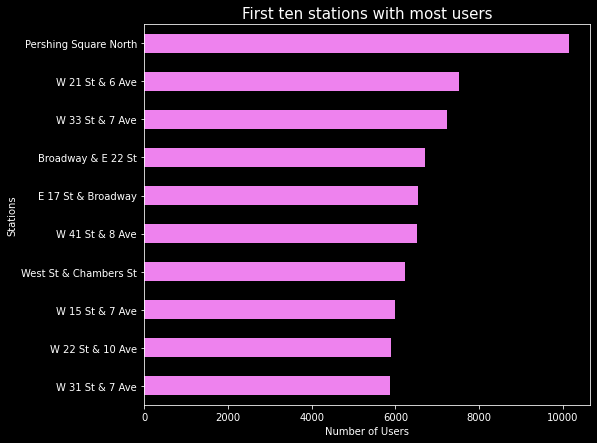

In [69]:
# Plot first 10 most visted station
plt.figure(figsize=(8,7))
data['start_station_name'].value_counts()[:10].sort_values(ascending = True).plot(kind='barh', color = "violet")
plt.title("First ten stations with most users", fontsize = 15)
plt.xlabel("Number of Users", fontsize = 10)
plt.ylabel("Stations");

## Daily trends for customers

In [36]:
# Import datetime
import datetime as datetime

In [37]:
# Get the start_date column
per_stations_counts = data['start_time'].tolist()
use_this = per_stations_counts

The data is in the datetime format, you only need the date part. The code below extracts this.

In [38]:
# Get the date fro the datetime object
date_obj = []
for i in use_this:
    date_obj.append(f"{datetime.datetime.date(i)}")

# first 10 dates
date_obj[:10]

['2018-05-31',
 '2018-05-31',
 '2018-05-31',
 '2018-05-31',
 '2018-05-31',
 '2018-05-31',
 '2018-05-31',
 '2018-05-31',
 '2018-05-31',
 '2018-05-31']

In [39]:
# confirm the length of the date_obj
len(date_obj)

1048575

In [40]:
# list of the unique dates in the date_obj
unique_dates = np.unique(date_obj).tolist()
unique_dates

['2018-05-10',
 '2018-05-11',
 '2018-05-12',
 '2018-05-13',
 '2018-05-14',
 '2018-05-15',
 '2018-05-16',
 '2018-05-17',
 '2018-05-18',
 '2018-05-19',
 '2018-05-20',
 '2018-05-21',
 '2018-05-22',
 '2018-05-23',
 '2018-05-24',
 '2018-05-25',
 '2018-05-26',
 '2018-05-27',
 '2018-05-28',
 '2018-05-29',
 '2018-05-30',
 '2018-05-31']

In [41]:
# legth of unique dates
len(np.unique(date_obj))

22

There 22 unique date objects in the start_time column

In [42]:
# Create a series of the date object
date_series = pd.Series(date_obj)
date_series[:10]

0    2018-05-31
1    2018-05-31
2    2018-05-31
3    2018-05-31
4    2018-05-31
5    2018-05-31
6    2018-05-31
7    2018-05-31
8    2018-05-31
9    2018-05-31
dtype: object

In [43]:
# count the number of unique dates
counts = date_series.value_counts()
counts

2018-05-24    66487
2018-05-23    65464
2018-05-30    65266
2018-05-11    64771
2018-05-21    62287
2018-05-29    61958
2018-05-25    59854
2018-05-14    57726
2018-05-18    56761
2018-05-10    54027
2018-05-31    51898
2018-05-15    47463
2018-05-20    45749
2018-05-17    45472
2018-05-22    44965
2018-05-26    38953
2018-05-28    38673
2018-05-16    30795
2018-05-12    29330
2018-05-13    22635
2018-05-27    21670
2018-05-19    16371
dtype: int64

In [44]:
# re-order indeces to the order of incrementing dates
count_trends = counts.reindex(unique_dates)
dates, users = count_trends.index[:], count_trends.values

In [45]:
count_trends

2018-05-10    54027
2018-05-11    64771
2018-05-12    29330
2018-05-13    22635
2018-05-14    57726
2018-05-15    47463
2018-05-16    30795
2018-05-17    45472
2018-05-18    56761
2018-05-19    16371
2018-05-20    45749
2018-05-21    62287
2018-05-22    44965
2018-05-23    65464
2018-05-24    66487
2018-05-25    59854
2018-05-26    38953
2018-05-27    21670
2018-05-28    38673
2018-05-29    61958
2018-05-30    65266
2018-05-31    51898
dtype: int64

In [46]:
# Create a time series dataframe
time_series_data = pd.DataFrame({"Date": count_trends.index[:], "total_users": count_trends})
time_series_data

,Date,total_users
2018-05-10,2018-05-10,54027
2018-05-11,2018-05-11,64771
2018-05-12,2018-05-12,29330
2018-05-13,2018-05-13,22635
2018-05-14,2018-05-14,57726
2018-05-15,2018-05-15,47463
2018-05-16,2018-05-16,30795
2018-05-17,2018-05-17,45472
2018-05-18,2018-05-18,56761
2018-05-19,2018-05-19,16371


/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


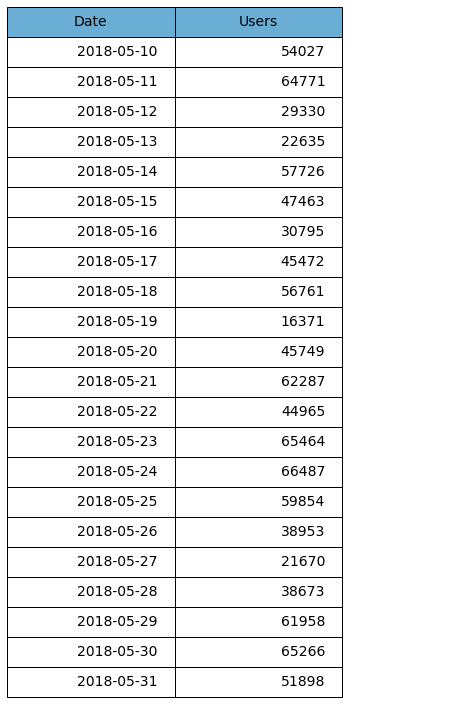

In [47]:
# Create a time series table
users_data = time_series_data
col_head = ("Date", "Users")
users_data_np = users_data.to_numpy()
# define the figure to plot the data
plt.figure(linewidth = 2, tight_layout={"pad": 0.5}, figsize = (2,1))

axes_8 = plt.gca()
axes_8.get_xaxis().set_visible(False)
axes_8.get_yaxis().set_visible(False)
plt.box(on = None)

# craete a color map
ccolors = plt.cm.Blues(np.full(len(col_head), 0.5))
the_table = plt.table(cellText = users_data_np, loc ="left", colLabels= col_head,
                      colColours = ccolors)
# define font sizee
the_table.set_fontsize(14);
the_table.scale(3, 2.5);

In [48]:
# Dates data
dates

Index(['2018-05-10', '2018-05-11', '2018-05-12', '2018-05-13', '2018-05-14',
       '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18', '2018-05-19',
       '2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
       '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29',
       '2018-05-30', '2018-05-31'],
      dtype='object')

In [49]:
# time series values
users

array([54027, 64771, 29330, 22635, 57726, 47463, 30795, 45472, 56761,
       16371, 45749, 62287, 44965, 65464, 66487, 59854, 38953, 21670,
       38673, 61958, 65266, 51898])

In [50]:
# Create X values
x = (np.arange(len(dates)) + 10)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31])

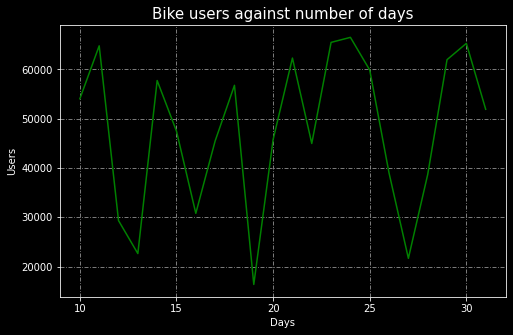

In [70]:
# Plot time series
plt.figure(figsize=(8,5))
plt.plot(x, users, c="g")
# plt.xticks(x)
plt.title("Bike users against number of days", fontsize = (15))
plt.ylabel("Users")
plt.xlabel("Days")
plt.grid(True, color = "0.6", dashes = (5,2,1,2));

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
# Extract components of the timeseries, your can assume either additive or matplicative model in the case of this data
ts_decomposition = seasonal_decompose(x=users, model='multiplicative', freq=1)
trend_estimate = ts_decomposition.trend

# The following components are options, we are not going to use them
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


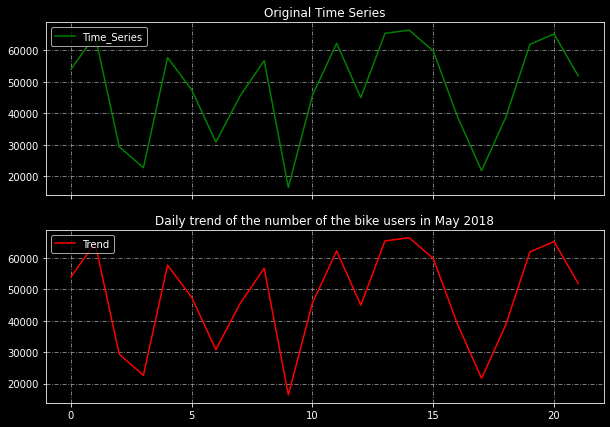

In [71]:
# Plot the time series and trend component
fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.title("Daily trend of the number of the bike users in May 2018")
axes[0].plot(users, label='Time_Series', c = "g")
axes[0].legend(loc='upper left')
axes[0].grid(True, color = "0.6", dashes = (5,2,1,2))
axes[0].title.set_text("Original Time Series")

axes[1].plot(trend_estimate, label='Trend', c = "r")
axes[1].legend(loc='upper left')
axes[1].grid(True, color = "0.6", dashes = (5,2,1,2));

There isno trend in the dataset